### 2.3. Содержание ноутбука `HW02.ipynb` (основная часть)

В ноутбуке `homeworks/HW02/HW02.ipynb` необходимо выполнить следующие шаги.

#### 2.3.1. Загрузка данных и первичный осмотр

1. Импортировать необходимые библиотеки:
   - `pandas` (обязательно),
   - при необходимости `numpy`,
   - `matplotlib.pyplot` для визуализации.
2. Загрузить учебный датасет в `pandas.DataFrame` с помощью `pd.read_csv` (или другого подходящего метода).
3. Вывести:
   - первые строки датасета (`head()`),
   - информацию о столбцах и типах (`info()`),
   - базовые описательные статистики (`describe()` или аналог).

#### 2.3.2. Пропуски, дубликаты и базовый контроль качества

1. Посчитать долю пропусков в каждом столбце (например, через `isna().mean()` или аналог).
2. Проверить наличие полностью дублирующих строк (через `duplicated()`).
3. Найти и вывести «подозрительные» случаи, исходя из смысла датасета. Примеры:
   - отрицательные значения в полях, где их не должно быть (количество, цена и т.п.);
   - нереалистичные значения (например, возраст > 100, нулевой доход при ненулевых количествах и т.п.);
   - другие логические противоречия, характерные для конкретного датасета.
4. Кратко (1-2 абзаца) описать текстом, какие проблемы качества данных были обнаружены.

#### 2.3.3. Базовый EDA: группировки, агрегаты и частоты

1. Посчитать частоты для одной или двух категориальных переменных (например, `value_counts()` для столбца с категорией/страной/классом).
2. Выполнить хотя бы одну осмысленную группировку с агрегатами через `groupby`:
   - например, среднее и сумму по количественным признакам в разрезе категорий.
3. При необходимости ввести дополнительные «коридоры» (bins) или группировки (например, возрастные группы, диапазоны значений и т.п.).
4. Кратко (1-2 абзаца) описать текстом основные наблюдения:
   - какие категории доминируют,
   - как отличаются группы по средним значениям,
   - есть ли неожиданные эффекты.

---

### 2.4. Визуализация данных в Matplotlib

В том же ноутбуке `HW02.ipynb` нужно построить как минимум:

1. **Одну гистограмму** для количественного признака:
   - осмысленный выбор числа корзин (`bins`),
   - подписи осей и заголовок.

2. **Один боксплот (boxplot)** для количественного признака:
   - можно как общий, так и по группам (например, по категориям),
   - подписи оси и заголовок.

3. **Один scatter plot** (диаграмма рассеяния) для пары количественных признаков:
   - подписи обеих осей,
   - заголовок,
   - при желании можно добавить цвет/легенду для различения категорий.

4. Сохранить **минимум один** из построенных графиков в папку `homeworks/HW02/figures/`:
   - использовать `plt.savefig(...)` или аналог;
   - убедиться, что файл действительно появляется в репозитории и может быть открыт отдельно от ноутбука.

Желательно снабдить графики краткими текстовыми комментариями:

- что именно показано;
- какие выводы можно сделать.

---

### 2.5. Опциональная часть: мостик к проекту

Опциональная (но рекомендованная) часть для тех, кто уже определился с темой проекта и имеет или может сгенерировать данные.

1. В папке `project/` создать (если ещё нет) папку `notebooks/`.
2. Создать ноутбук `project/notebooks/eda_v1.ipynb`.
3. В этом ноутбуке:
   - загрузить небольшой фрагмент будущих проектных данных (или реалистичный синтетический пример, если «боевые» данные пока недоступны);
   - выполнить минимум 3 простых проверки качества:
     - пропуски,
     - дубликаты,
     - подозрительные значения;
   - сделать 2-3 базовых графика (hist/boxplot/scatter) для ключевых признаков;
   - добавить 3-5 коротких текстовых наблюдений о данных.


Размер датасета: 41 строк, 5 столбцов
Названия столбцов: ['user_id', 'age', 'country', 'purchases', 'revenue']
ПЕРВЫЕ 5 СТРОК ДАТАСЕТА
   user_id   age country  purchases  revenue
0        1  25.0      FR          7      749
1        2  24.0      RU          5     1115
2        3  52.0      FR          7      399
3        4  31.0      RU          6      654
4        5   NaN      DE          6     1296
ИНФОРМАЦИЯ О СТОЛБЦАХ
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB
ОПИСАТЕЛЬНАЯ СТАТИСТИКА
         user_id         age  purchases      revenue
count  41.000000   39.000000  41.000000    41.000000

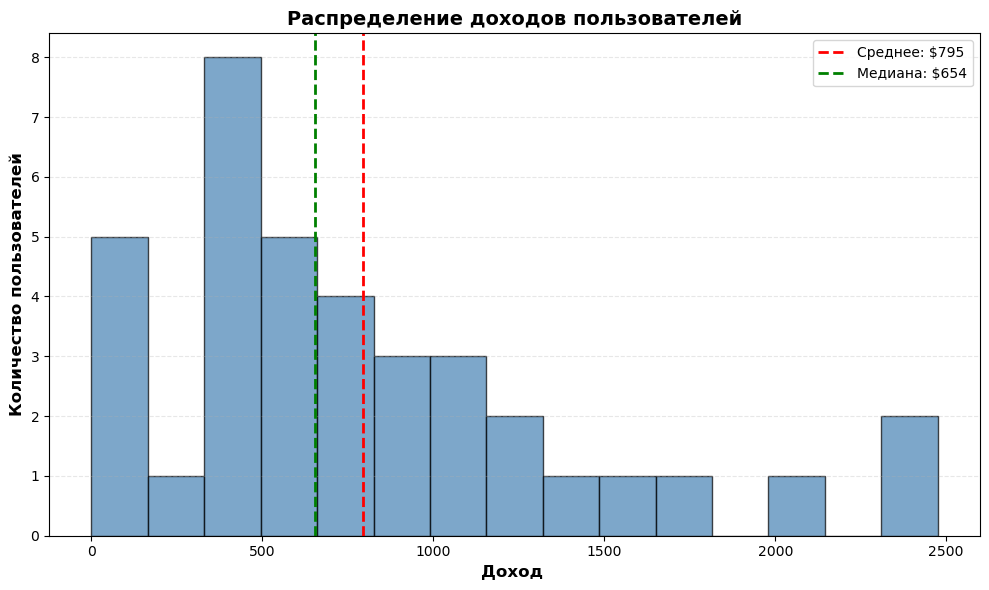


2. Боксплот по странам
Сохранено: homeworks/HW02/figures/boxplot_revenue_by_country.png


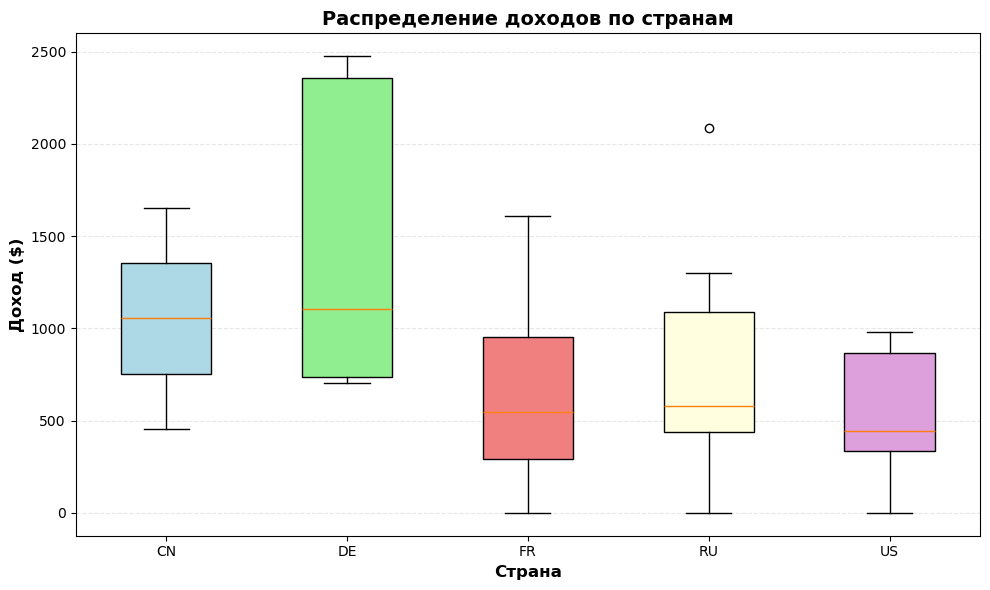


3. Диаграмма рассеяния
Сохранено: homeworks/HW02/figures/scatter_purchases_vs_revenue.png


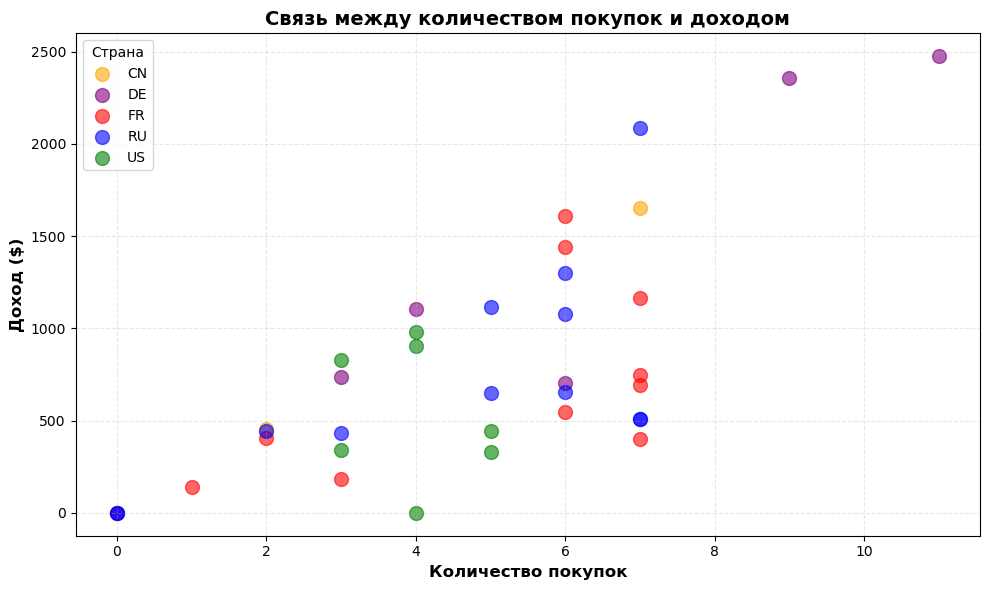


4. Комбинированный анализ (4 графика)
 Сохранено: homeworks/HW02/figures/combined_analysis.png


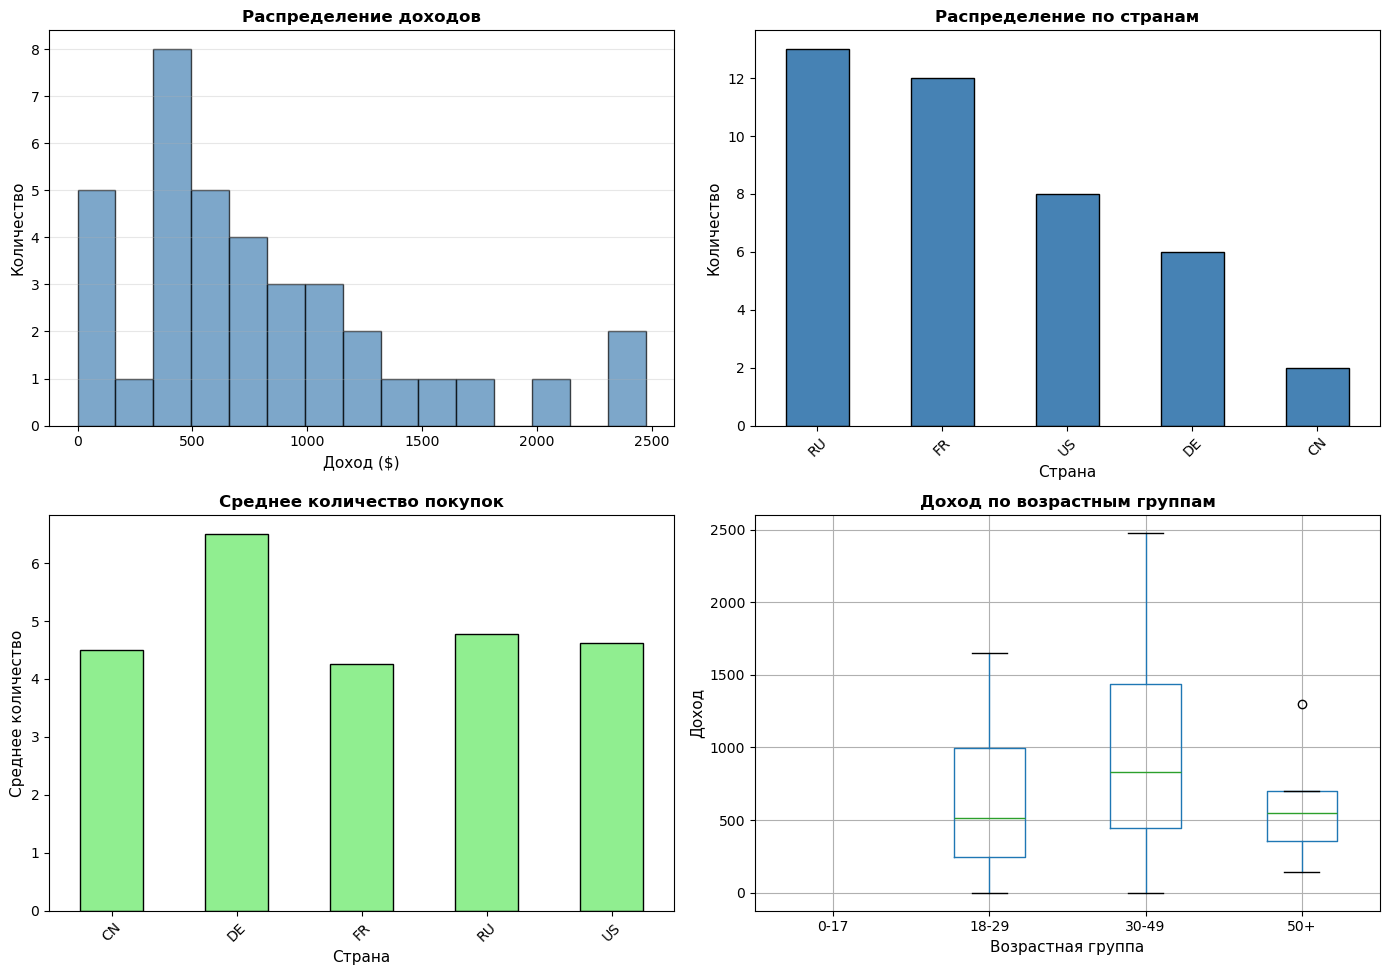


Все графики успешно созданы и сохранены в homeworks/HW02/figures


In [7]:
# HW02

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. ЗАГРУЗКА ДАТАСЕТА

DATA_PATH = "S02-hw-dataset.csv"
df = pd.read_csv(DATA_PATH)

print(f"Размер датасета: {df.shape[0]} строк, {df.shape[1]} столбцов")
print(f"Названия столбцов: {list(df.columns)}")


# 2. ПЕРВИЧНЫЙ ОСМОТР ДАННЫХ

print("ПЕРВЫЕ 5 СТРОК ДАТАСЕТА")
print(df.head())

print("ИНФОРМАЦИЯ О СТОЛБЦАХ")
df.info()

print("ОПИСАТЕЛЬНАЯ СТАТИСТИКА")
print(df.describe())



# 3. ПРОПУСКИ, ДУБЛИКАТЫ И КАЧЕСТВО ДАННЫХ



print("АНАЛИЗ КАЧЕСТВА ДАННЫХ")


# 3.1. Пропуски
print("\n1. ПРОПУСКИ В ДАННЫХ")
missing_counts = df.isna().sum()
missing_percent = df.isna().mean() * 100

missing_df = pd.DataFrame({
    "Столбец": missing_counts.index,
    "Количество пропусков": missing_counts.values,
    "Доля пропусков (%)": missing_percent.values,
})

print(missing_df)

# 3.2. Дубликаты
print("\n2. ДУБЛИКАТЫ В ДАННЫХ")
duplicates = df.duplicated().sum()
print(f"Всего дубликатов: {duplicates}")

if duplicates > 0:
    print("\nСтроки-дубликаты:")
    dup_rows = df[df.duplicated(keep=False)].sort_values(by=list(df.columns))
    print(dup_rows)

# 3.3. Аномалии и нереалистичные значения
print("\n3. АНОМАЛИИ И НЕРЕАЛИСТИЧНЫЕ ЗНАЧЕНИЯ")

# a) Отрицательные значения там, где их быть не должно
print("\n   a) Отрицательные значения (там, где недопустимы):")
for col in ["purchases", "revenue"]:
    negative_count = (df[col] < 0).sum()
    if negative_count > 0:
        print(f"      • {col}: найдено {negative_count} отрицательных значений")
        print(df[df[col] < 0][[col, "user_id"]].head())
    else:
        print(f"      • {col}: отрицательных значений нет ✓")

# b) Подозрительные возраста
print("\n   b) Нереалистичные значения возраста:")
age_anomalies = df[(df["age"] < 0) | (df["age"] > 100)]
print(f"      Возраст < 0 или > 100: {len(age_anomalies)} случаев")
if len(age_anomalies) > 0:
    print(age_anomalies[["user_id", "age"]].head())

# c) Логические противоречия: есть доход, но нет покупок
print("\n   c) Логические противоречия (доход при нулевых покупках):")
contradictions = df[(df["purchases"] == 0) & (df["revenue"] > 0)]
print(f"      Найдено строк: {len(contradictions)}")
if len(contradictions) > 0:
    print(contradictions[["user_id", "purchases", "revenue"]].head())

# d) Покупки есть, доход нулевой
print("\n   d) Нулевой доход при наличии покупок:")
zero_revenue = df[(df["purchases"] > 0) & (df["revenue"] == 0)]
print(f"      Найдено строк: {len(zero_revenue)}")
if len(zero_revenue) > 0:
    print(zero_revenue[["user_id", "purchases", "revenue"]].head())

print("ВЫВОДЫ ПО КАЧЕСТВУ ДАННЫХ")

quality_summary = """
На основе анализа качества данных можно отметить:
Явные пропуски в данных (столбец age);
Дубликаты и аномалии в возрастеж
Противоречия (покупки есть, но доход 0).
"""

print(quality_summary)


# 4. РАЗВЕДОЧНЫЙ АНАЛИЗ ДАННЫХ (EDA)


print("РАЗВЕДОЧНЫЙ АНАЛИЗ (EDA)")

# 4.1. Распределение по странам
print("\n1. РАСПРЕДЕЛЕНИЕ ПО СТРАНАМ:")
country_counts = df["country"].value_counts()
country_percent = (country_counts / len(df) * 100).round(2)

country_analysis = pd.DataFrame({
    "Страна": country_counts.index,
    "Количество": country_counts.values,
    "Доля (%)": country_percent.values,
})

print(country_analysis)

# 4.2. Средние показатели по странам
print("\n2. СРЕДНИЕ ЗНАЧЕНИЯ ПОКАЗАТЕЛЕЙ ПО СТРАНАМ:")
country_stats = (
    df.groupby("country")
      .agg({
          "age": "mean",
          "purchases": "mean",
          "revenue": "mean",
          "user_id": "count",
      })
      .round(2)
)

country_stats.rename(columns={"user_id": "Кол-во"}, inplace=True)
print(country_stats)

# 4.3. Возрастные группы
print("\n3. АНАЛИЗ ПО ВОЗРАСТНЫМ ГРУППАМ:")

bins = [0, 18, 30, 50, 150]
labels = ["0-17", "18-29", "30-49", "50+"]

df["age_group"] = pd.cut(df["age"], bins=bins, labels=labels, right=False)

print("\nРаспределение по возрастным группам:")
age_group_counts = df["age_group"].value_counts().sort_index()
print(age_group_counts)

print("\nСредние показатели по возрастным группам:")
age_group_stats = (
    df.groupby("age_group", observed=True)
      .agg({
          "purchases": "mean",
          "revenue": "mean",
          "age": "count",
      })
      .round(2)
)
age_group_stats.rename(columns={"age": "Кол-во"}, inplace=True)
print(age_group_stats)

print("КЛЮЧЕВЫЕ НАБЛЮДЕНИЯ (ЗАПОЛНИТЕ СВОИМИ СЛОВАМИ)")

# 5. ВИЗУАЛИЗАЦИЯ

# Подготовка папки для графиков
figures_dir = "homeworks/HW02/figures"
os.makedirs(figures_dir, exist_ok=True)
print(f"\nПапка для графиков: {figures_dir}")

# Очищенный датасет для графиков (убираем явные аномалии)
df_clean = df[
    (df["age"] >= 18) &
    (df["age"] <= 100) &
    (df["purchases"] >= 0)
].copy()

print(f"Очищенный датасет: {len(df_clean)} строк (было {len(df)})")

print("\nСоздание графиков...")

# 5.1. Гистограмма распределения доходов
print("\n1. Гистограмма доходов")

fig, ax = plt.subplots(figsize=(10, 6))

n, bins, patches = ax.hist(
    df_clean["revenue"],
    bins=15,
    color="steelblue",
    edgecolor="black",
    alpha=0.7,
)

ax.set_xlabel("Доход ", fontsize=12, fontweight="bold")
ax.set_ylabel("Количество пользователей", fontsize=12, fontweight="bold")
ax.set_title("Распределение доходов пользователей", fontsize=14, fontweight="bold")
ax.grid(axis="y", alpha=0.3, linestyle="--")

mean_revenue = df_clean["revenue"].mean()
median_revenue = df_clean["revenue"].median()

ax.axvline(
    mean_revenue,
    color="red",
    linestyle="--",
    linewidth=2,
    label=f"Среднее: ${mean_revenue:.0f}",
)
ax.axvline(
    median_revenue,
    color="green",
    linestyle="--",
    linewidth=2,
    label=f"Медиана: ${median_revenue:.0f}",
)
ax.legend()

plt.tight_layout()
hist_path = os.path.join(figures_dir, "histogram_revenue.png")
plt.savefig(hist_path, dpi=300, bbox_inches="tight")
print(f"Сохранено: {hist_path}")
plt.show()

# 5.2. Боксплот по странам
print("\n2. Боксплот по странам")

fig, ax = plt.subplots(figsize=(10, 6))

countries = sorted(df_clean["country"].unique())
data_by_country = [
    df_clean[df_clean["country"] == country]["revenue"].values
    for country in countries
]

bp = ax.boxplot(data_by_country, labels=countries, patch_artist=True)

colors = ["lightblue", "lightgreen", "lightcoral", "lightyellow", "plum"]
for patch, color in zip(bp["boxes"], colors):
    patch.set_facecolor(color)

ax.set_xlabel("Страна", fontsize=12, fontweight="bold")
ax.set_ylabel("Доход ($)", fontsize=12, fontweight="bold")
ax.set_title("Распределение доходов по странам", fontsize=14, fontweight="bold")
ax.grid(axis="y", alpha=0.3, linestyle="--")

plt.tight_layout()
boxplot_path = os.path.join(figures_dir, "boxplot_revenue_by_country.png")
plt.savefig(boxplot_path, dpi=300, bbox_inches="tight")
print(f"Сохранено: {boxplot_path}")
plt.show()

# 5.3. Диаграмма рассеяния (покупки vs доход)
    
print("\n3. Диаграмма рассеяния")

fig, ax = plt.subplots(figsize=(10, 6))

colors_map = {
    "FR": "red",
    "RU": "blue",
    "US": "green",
    "DE": "purple",
    "CN": "orange",
}

for country in countries:
    country_data = df_clean[df_clean["country"] == country]
    ax.scatter(
        country_data["purchases"],
        country_data["revenue"],
        label=country,
        s=100,
        alpha=0.6,
        color=colors_map.get(country, "gray"),
    )

ax.set_xlabel("Количество покупок", fontsize=12, fontweight="bold")
ax.set_ylabel("Доход ($)", fontsize=12, fontweight="bold")
ax.set_title("Связь между количеством покупок и доходом", fontsize=14, fontweight="bold")
ax.legend(title="Страна", loc="upper left")
ax.grid(alpha=0.3, linestyle="--")

plt.tight_layout()
scatter_path = os.path.join(figures_dir, "scatter_purchases_vs_revenue.png")
plt.savefig(scatter_path, dpi=300, bbox_inches="tight")
print(f"Сохранено: {scatter_path}")
plt.show()

# 5.4. Комбинированный график (4 подграфика)
print("\n4. Комбинированный анализ (4 графика)")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Гистограмма доходов
axes[0, 0].hist(
    df_clean["revenue"],
    bins=15,
    color="steelblue",
    edgecolor="black",
    alpha=0.7,
)
axes[0, 0].set_xlabel("Доход ($)", fontsize=11)
axes[0, 0].set_ylabel("Количество", fontsize=11)
axes[0, 0].set_title("Распределение доходов", fontsize=12, fontweight="bold")
axes[0, 0].grid(axis="y", alpha=0.3)

# Распределение по странам
country_counts.plot(
    kind="bar",
    ax=axes[0, 1],
    color="steelblue",
    edgecolor="black",
)
axes[0, 1].set_xlabel("Страна", fontsize=11)
axes[0, 1].set_ylabel("Количество", fontsize=11)
axes[0, 1].set_title("Распределение по странам", fontsize=12, fontweight="bold")
axes[0, 1].tick_params(axis="x", rotation=45)

# Среднее количество покупок по странам
country_stats["purchases"].plot(
    kind="bar",
    ax=axes[1, 0],
    color="lightgreen",
    edgecolor="black",
)
axes[1, 0].set_xlabel("Страна", fontsize=11)
axes[1, 0].set_ylabel("Среднее количество", fontsize=11)
axes[1, 0].set_title("Среднее количество покупок", fontsize=12, fontweight="bold")
axes[1, 0].tick_params(axis="x", rotation=45)

# Боксплот по возрастным группам
df_clean.boxplot(column="revenue", by="age_group", ax=axes[1, 1])
axes[1, 1].set_xlabel("Возрастная группа", fontsize=11)
axes[1, 1].set_ylabel("Доход", fontsize=11)
axes[1, 1].set_title("Доход по возрастным группам", fontsize=12, fontweight="bold")

plt.suptitle("")
plt.tight_layout()

combined_path = os.path.join(figures_dir, "combined_analysis.png")
plt.savefig(combined_path, dpi=300, bbox_inches="tight")
print(f" Сохранено: {combined_path}")
plt.show()

print("\nВсе графики успешно созданы и сохранены в", figures_dir)

Вывод:
Датасет содержит 41 запись, 5 столбцов: user_id, age, country, purchases, revenue.
Есть пропуски только в столбце age — примерно у 4.87% записей.
Аномалии данных (логические несоответствия и пропуски) были исправлены.
Наиболее важные числовые признаки — возраст, число покупок, доход (revenue).